**Classification Task**

Given a dataset 'diabetes.csv', our aim is to classify whether patient in the dataset have diabetes or not. The dataset consists of 8 features namely "Pregnancies, Glucose, Blood Pressure, Skin Thickness, Insulin, BMI, DiabetesPedigreeFunction and Age". 

The target variable is outcome column. Accuracy is the metric for evaluation.


Import the necessary libraries

In [1]:
#Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
import math

df = pd.read_csv('/content/diabetes.csv')

#1. Data Preprocessing

##Given dataset

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From the statistics of the data, we can infer that the given dataset needs preprocessing for use. The required preprocessing is done and discussed in detail further ahead.

##Data Preprocessing

Number of zeros in each feature of the dataset is given below.

In [4]:
(df == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

### Deleting rows:

We'll delete rows where Glucose, BloodPressure and BMI is zero. This is because of very small number of zeros in the columns.

In [5]:
df.drop(axis="rows", labels = df.index[df['Glucose'] == 0], inplace = True)
df.drop(axis="rows", labels = df.index[df['BloodPressure'] == 0], inplace = True)
df.drop(axis="rows", labels = df.index[df['BMI'] == 0], inplace = True)

###Deleting Columns:

We'll remove the columns which have lots of zeros in them. These zeros are illogical values.

In [6]:
df.drop(axis="columns", labels="SkinThickness", inplace=True) 
df.drop(axis="columns", labels="Insulin", inplace=True)

Check for ? in the dataset

In [7]:
(df=='?').sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

###Duplicate rows:

We need to check and remove the duplicate rows from the dataset. Here, there are no duplicate rows.

In [8]:
df.index[df.duplicated()]

Int64Index([], dtype='int64')

###Data Description:

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,32.467127,0.474765,33.350829,0.343923
std,3.362803,30.750030,12.379870,6.888941,0.332315,11.765393,0.475344
min,0.000000,44.000000,24.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,32.400000,0.379000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,67.100000,2.420000,81.000000,1.000000


##Exploratory Data Analysis:

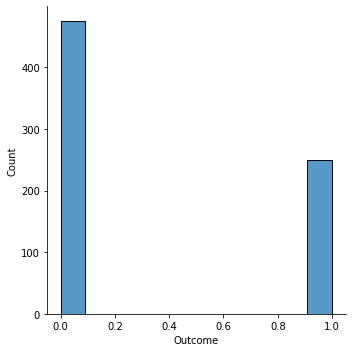

In [10]:
sns.displot(df['Outcome'])

In [11]:
(df['Outcome'] == 0).sum()

475

In [12]:
(df['Outcome'] == 1).sum()

249

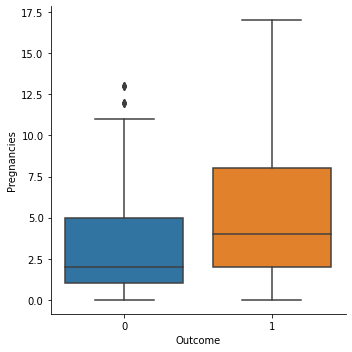

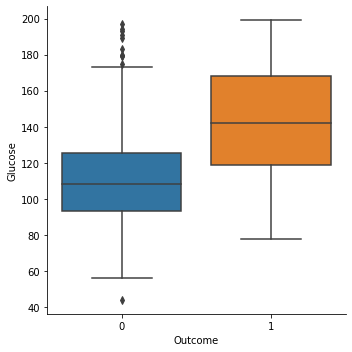

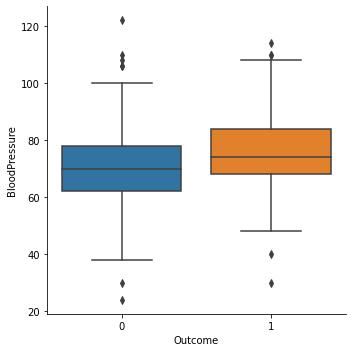

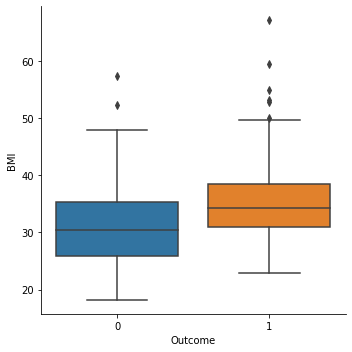

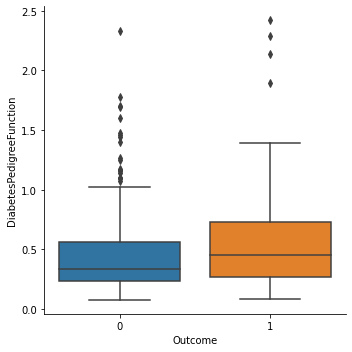

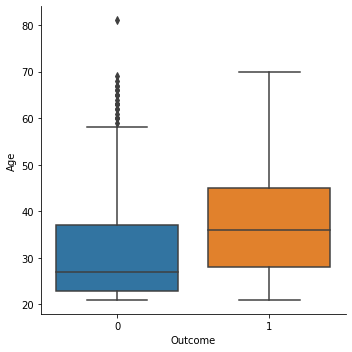

In [13]:
cont_vars = list(df.columns)[:6]
for col in cont_vars:
  sns.catplot(kind="box", x="Outcome", y=col, data=df)

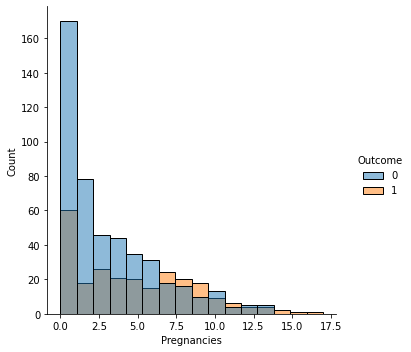

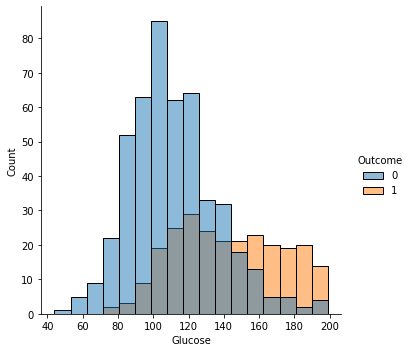

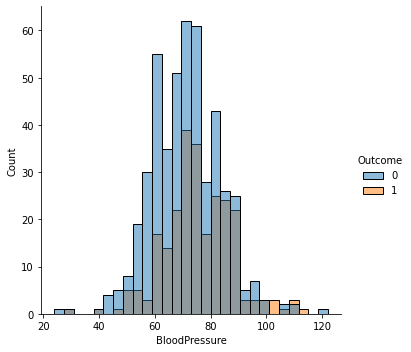

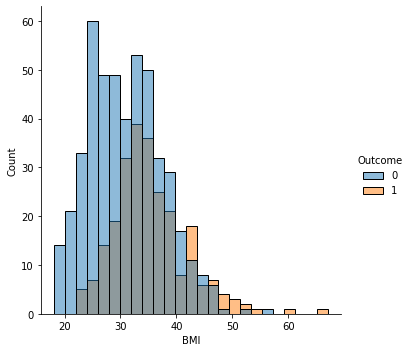

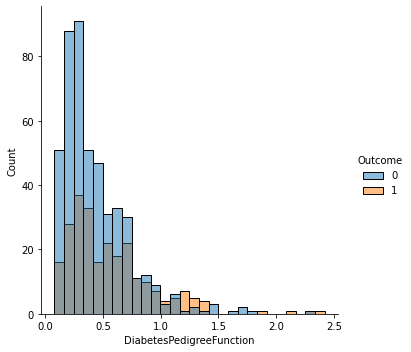

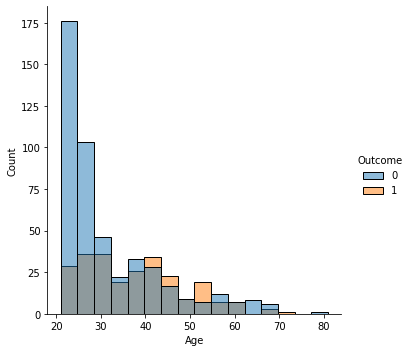

In [14]:
cont_vars = list(df.columns)[:6]
for col in cont_vars:
  sns.displot(df, x=col, hue='Outcome')

Function to remove outliers

In [15]:
def upperlowerbounds(data, feature):
  uquartile = data[feature].loc[(data['Outcome'] == 0)].quantile(0.75)
  lquartile = data[feature].loc[(data['Outcome'] == 0)].quantile(0.25)
  ubound0 = uquartile + 1.5 * (uquartile - lquartile)
  lbound0 = lquartile - 1.5 * (uquartile - lquartile)  

  uquartile = data[feature].loc[(data['Outcome'] == 1)].quantile(0.75)
  lquartile = data[feature].loc[(data['Outcome'] == 1)].quantile(0.25)
  ubound1 = uquartile + 1.5 * (uquartile - lquartile)
  lbound1 = lquartile - 1.5 * (uquartile - lquartile)

  return ubound0, lbound0, ubound1, lbound1

def removeOutliers(data, feature):
  ub0, lb0, ub1, lb1 = upperlowerbounds(data, feature)
  data.drop(axis="rows", labels = data.index[(data['Outcome'] == 0) & (data[feature] > ub0)], inplace = True)
  data.drop(axis="rows", labels = data.index[(data['Outcome'] == 0) & (data[feature] < lb0)], inplace = True)

  data.drop(axis="rows", labels = data.index[(data['Outcome'] == 1) & (data[feature] > ub1)], inplace = True)
  data.drop(axis="rows", labels = data.index[(data['Outcome'] == 1) & (data[feature] < lb1)], inplace = True)

###Pregnancies:

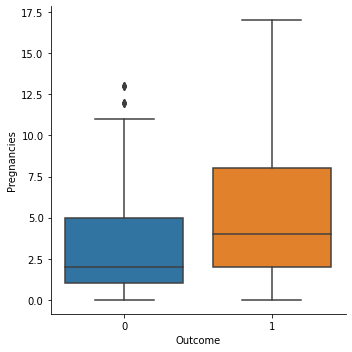

In [16]:
sns.catplot(kind="box", x="Outcome", y="Pregnancies", data=df)

In [17]:
ub0, lb0, ub1, lb1 = upperlowerbounds(df, 'Pregnancies')

In [18]:
df['Pregnancies'].loc[(df['Outcome'] == 0) & (df['Pregnancies'] > ub0)].count()

10

In [19]:
removeOutliers(df, 'Pregnancies')

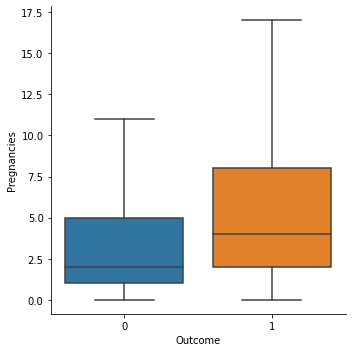

In [20]:
sns.catplot(kind="box", x="Outcome", y="Pregnancies", data=df)

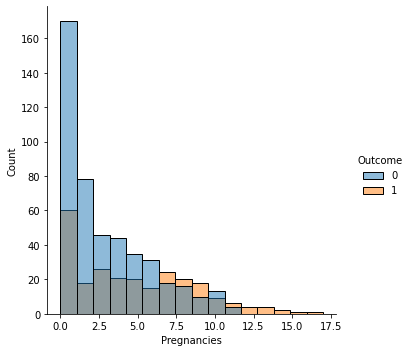

In [21]:
sns.displot(df, x='Pregnancies', hue='Outcome')

In [22]:
df['Pregnancies'] = df['Pregnancies'].apply(lambda x: math.log(x + 1))

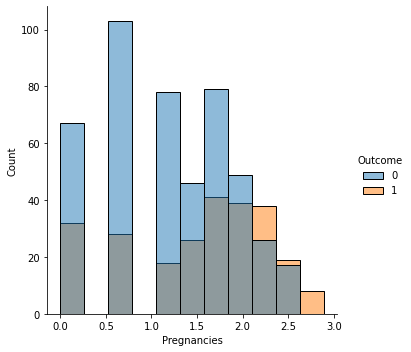

In [23]:
sns.displot(df, x='Pregnancies', hue='Outcome')

###Glucose:

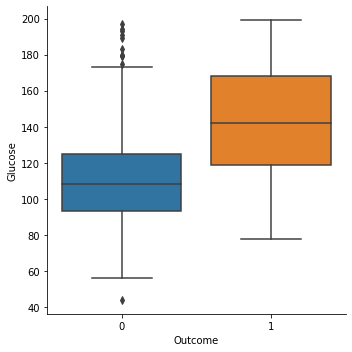

In [24]:
sns.catplot(kind="box", x="Outcome", y="Glucose", data=df)

In [25]:
ub0, lb0, ub1, lb1 = upperlowerbounds(df, 'Glucose')

In [26]:
u = df['Glucose'].loc[(df['Outcome'] == 0) & (df['Glucose'] > ub0)].count()
l = df['Glucose'].loc[(df['Outcome'] == 0) & (df['Glucose'] < lb0)].count()
print(u+l)

11


In [27]:
removeOutliers(df, 'Glucose')

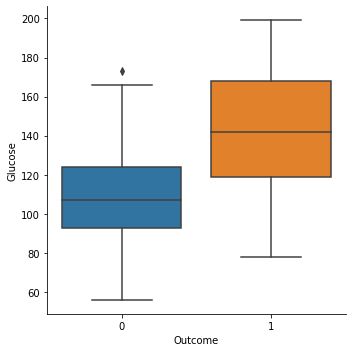

In [28]:
sns.catplot(kind="box", x="Outcome", y="Glucose", data=df)

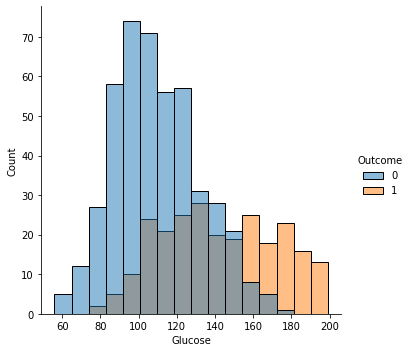

In [29]:
sns.displot(df, x='Glucose', hue='Outcome')

###BloodPressure:

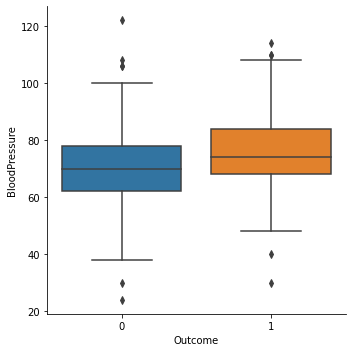

In [30]:
sns.catplot(kind="box", x="Outcome", y="BloodPressure", data=df)

In [31]:
ub0, lb0, ub1, lb1 = upperlowerbounds(df, 'BloodPressure')

In [32]:
u = df['BloodPressure'].loc[(df['Outcome'] == 0) & (df['BloodPressure'] > ub0)].count()
l = df['BloodPressure'].loc[(df['Outcome'] == 0) & (df['BloodPressure'] < lb0)].count()
print(u+l)

6


In [33]:
u = df['BloodPressure'].loc[(df['Outcome'] == 1) & (df['BloodPressure'] > ub1)].count()
l = df['BloodPressure'].loc[(df['Outcome'] == 1) & (df['BloodPressure'] < lb1)].count()
print(u+l)

5


In [34]:
removeOutliers(df, 'BloodPressure')

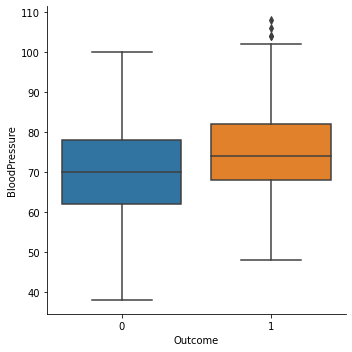

In [35]:
sns.catplot(kind="box", x="Outcome", y="BloodPressure", data=df)

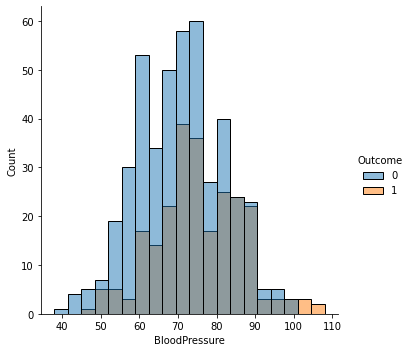

In [36]:
sns.displot(df, x='BloodPressure', hue='Outcome')

###BMI:

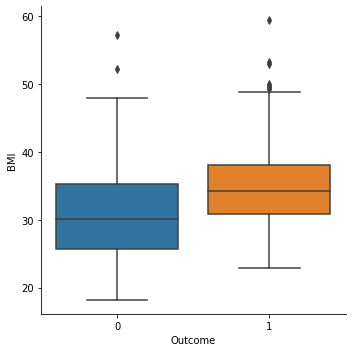

In [37]:
sns.catplot(kind="box", x="Outcome", y="BMI", data=df)

In [38]:
ub0, lb0, ub1, lb1 = upperlowerbounds(df, 'BMI')

In [39]:
u = df['BMI'].loc[(df['Outcome'] == 0) & (df['BMI'] > ub0)].count()
l = df['BMI'].loc[(df['Outcome'] == 0) & (df['BMI'] < lb0)].count()
print(u+l)

2


In [40]:
u = df['BMI'].loc[(df['Outcome'] == 1) & (df['BMI'] > ub1)].count()
l = df['BMI'].loc[(df['Outcome'] == 1) & (df['BMI'] < lb1)].count()
print(u+l)

7


In [41]:
removeOutliers(df, 'BMI')

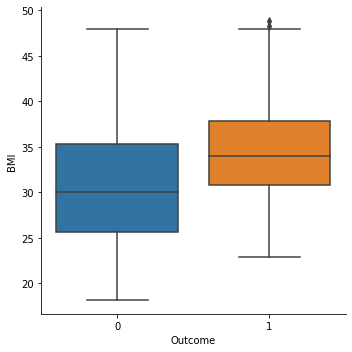

In [42]:
sns.catplot(kind="box", x="Outcome", y="BMI", data=df)

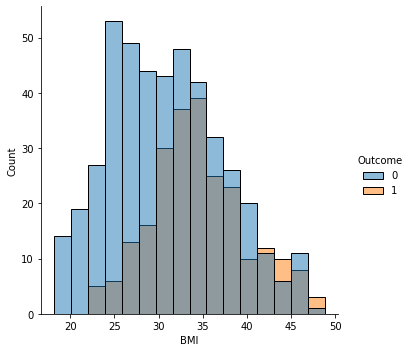

In [43]:
sns.displot(df, x='BMI', hue='Outcome')

###DiabetesPedigreeFunction:

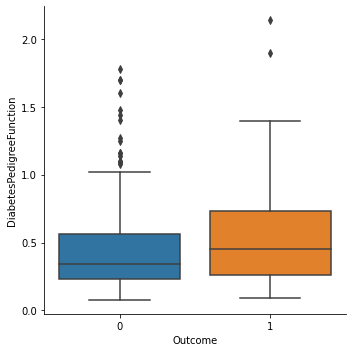

In [44]:
sns.catplot(kind="box", x="Outcome", y="DiabetesPedigreeFunction", data=df)

In [45]:
ub0, lb0, ub1, lb1 = upperlowerbounds(df, 'DiabetesPedigreeFunction')

In [46]:
u = df['DiabetesPedigreeFunction'].loc[(df['Outcome'] == 0) & (df['DiabetesPedigreeFunction'] > ub0)].count()
l = df['DiabetesPedigreeFunction'].loc[(df['Outcome'] == 0) & (df['DiabetesPedigreeFunction'] < lb0)].count()
print(u+l)

16


In [47]:
u = df['DiabetesPedigreeFunction'].loc[(df['Outcome'] == 1) & (df['DiabetesPedigreeFunction'] > ub1)].count()
l = df['DiabetesPedigreeFunction'].loc[(df['Outcome'] == 1) & (df['DiabetesPedigreeFunction'] < lb1)].count()
print(u+l)

2


In [48]:
removeOutliers(df, 'DiabetesPedigreeFunction')

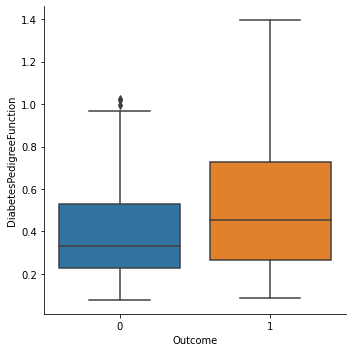

In [49]:
sns.catplot(kind="box", x="Outcome", y="DiabetesPedigreeFunction", data=df)

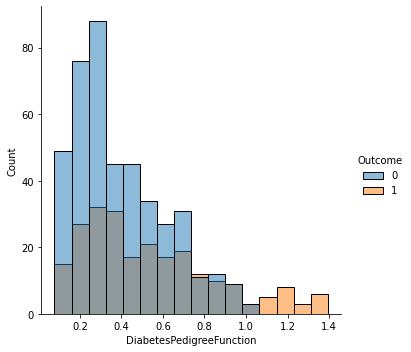

In [50]:
sns.displot(df, x='DiabetesPedigreeFunction', hue='Outcome')

In [51]:
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].apply(lambda x: math.log(x + 1))

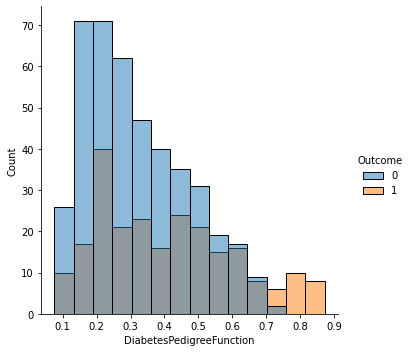

In [52]:
sns.displot(df, x='DiabetesPedigreeFunction', hue='Outcome')

###Age:

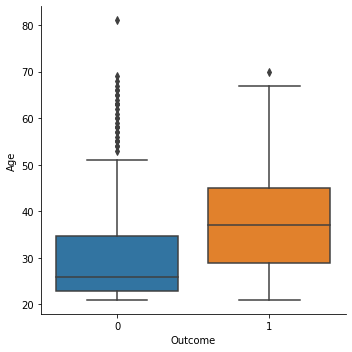

In [53]:
sns.catplot(kind="box", x="Outcome", y="Age", data=df)

In [54]:
ub0, lb0, ub1, lb1 = upperlowerbounds(df, 'Age')

In [55]:
u = df['Age'].loc[(df['Outcome'] == 0) & (df['Age'] > ub0)].count()
l = df['Age'].loc[(df['Outcome'] == 0) & (df['Age'] < lb0)].count()
print(u+l)

30


In [56]:
u = df['Age'].loc[(df['Outcome'] == 1) & (df['Age'] > ub1)].count()
l = df['Age'].loc[(df['Outcome'] == 1) & (df['Age'] < lb1)].count()
print(u+l)

1


In [57]:
removeOutliers(df, 'Age')

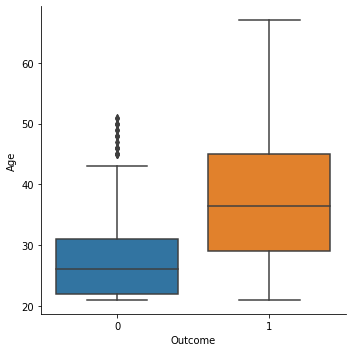

In [58]:
sns.catplot(kind="box", x="Outcome", y="Age", data=df)

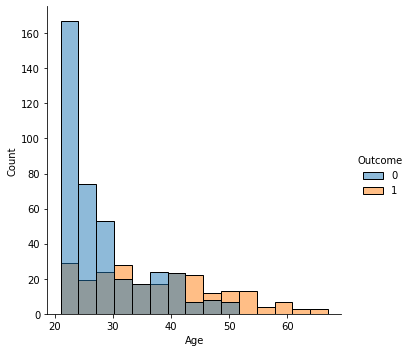

In [59]:
sns.displot(df, x='Age', hue='Outcome')

In [60]:
df["Age"] = df['Age'].apply(lambda x: math.log(x))

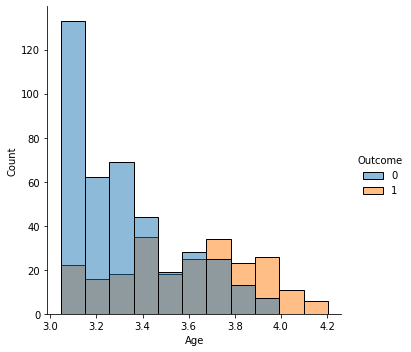

In [61]:
sns.displot(df, x='Age', hue='Outcome')

###Final data:

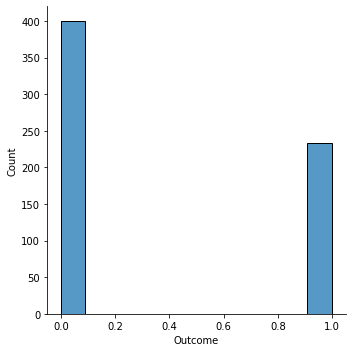

In [62]:
sns.displot(df['Outcome'])

In [63]:
df.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.945910,148,72,33.6,0.486738,3.912023,1
1,0.693147,85,66,26.6,0.300845,3.433987,0
2,2.197225,183,64,23.3,0.514021,3.465736,1
3,0.693147,89,66,28.1,0.154436,3.044522,0
5,1.791759,116,74,25.6,0.183155,3.401197,0


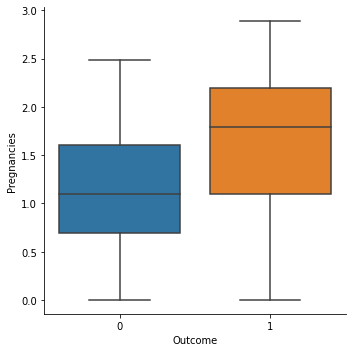

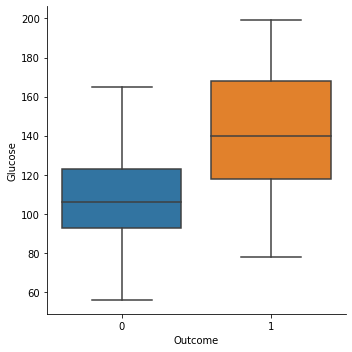

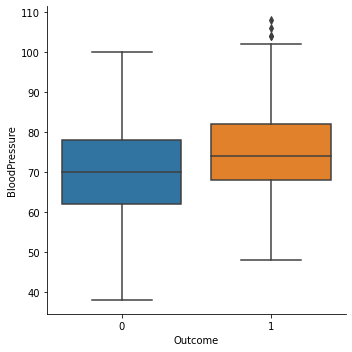

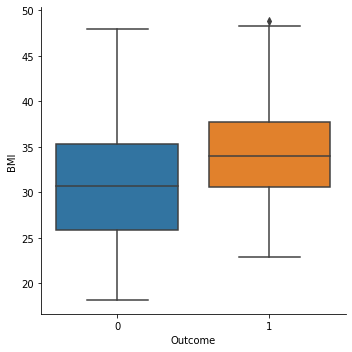

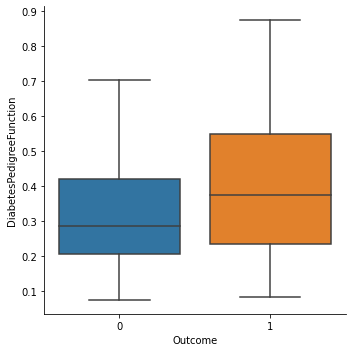

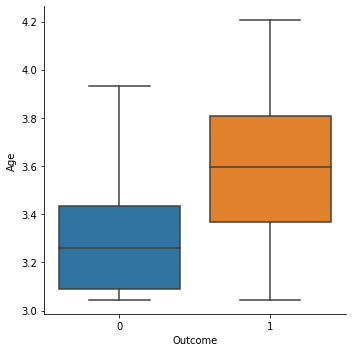

In [64]:
cont_vars = list(df.columns)[:6]
for col in cont_vars:
  sns.catplot(kind="box", x="Outcome", y=col, data=df)

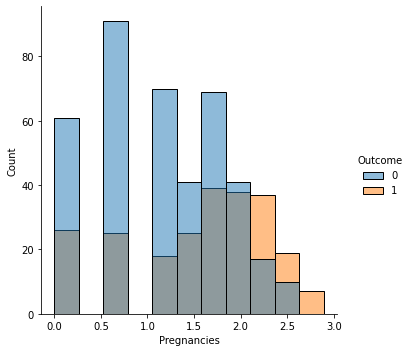

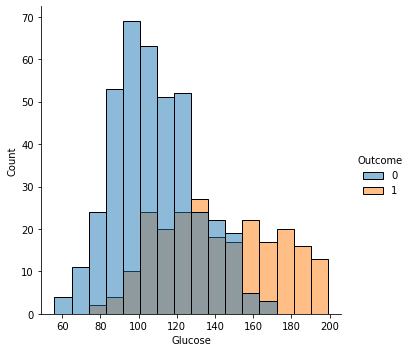

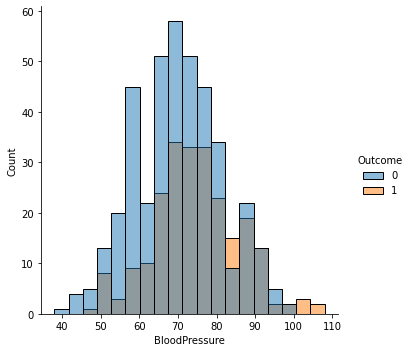

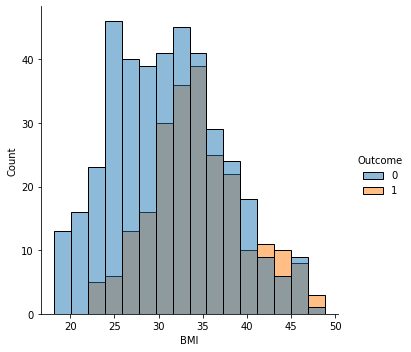

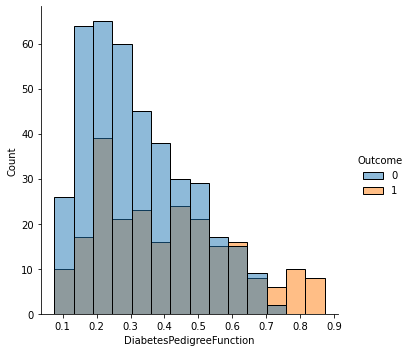

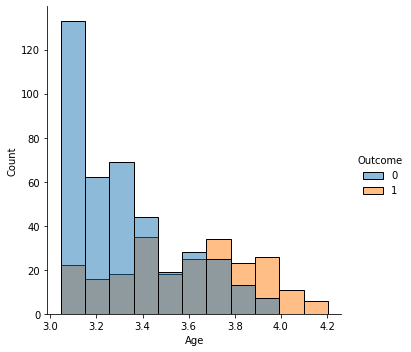

In [65]:
cont_vars = list(df.columns)[:6]
for col in cont_vars:
  sns.displot(df, x=col, hue='Outcome')

###1.3.8 Split training and testing dataset and minmax normalization:

Normalize the dataset:

In [66]:
def normalize(x):
  max = np.amax(x, axis=0)
  min = np.amin(x, axis=0)
  for row in x:
    for i in range(len(row)):
      row[i] = (row[i] - min[i]) / (max[i] - min[i])
  return x

Split into  training and testing

In [67]:
train = df.sample(frac =0.7, replace = False)
test = df.drop(train.index)

train = normalize(train.to_numpy())        #convert dataframe to numpy array
test = normalize(test.to_numpy())

x_train = np.delete(train, 6, 1)     #Remove outcome column
x_test = np.delete(test, 6, 1)

y_train = train[:,6]              #Outcome column
y_test = test[:,6]

Add ones in the matrix for constant term:

In [68]:
to_insert = np.ones(len(x_train))           #We insert 1 at the beginning for coefficient term
x_trainG = np.insert(x_train, 0, to_insert, axis=1)

to_insert = np.ones(len(x_test))           #We insert 1 at the beginning for coefficient term
x_testG = np.insert(x_test, 0, to_insert, axis=1)

Test the dataset:

In [69]:
def test(x, y, w):
  success = 0
  for i in range(len(x)):
    if(round(sigmoidFunction(w, x[i])) == int(y[i])):
      success += 1
  accuracy = 100.0 * success/len(x)
  miss = len(x) - success
  print('Hit count: ' + str(success))
  print('Miss count:' + str(miss))
  print('Accuracy: '+ str(accuracy) + '%' )

#2. Classification Models

##2.1 Logistic Regression:

###2.1.1 Gradient Descent:

Sigmoid function:

In [70]:
def sigmoidFunction(w, x):                #Parameters => weight matrix and x
  z = np.dot(w.T, x)                      #output => 1/1+e^{-wTx}
  return (1.0/(1+np.exp(-z)))

Function to compute cost:

In [71]:
def computeCost(w, y, x):             #Computes \sum yi * log(pi) + (1 - yi) log(1 - pi)
  cost = 0
  for i in range(len(x)):
    p = sigmoidFunction(w, x[i])
    cost += y[i] * math.log(p) + (1 - y[i]) * math.log(1 - p)
  return -cost

Plot cost vs iteration:

In [72]:
def plotCost(cost):
  plt.figure(figsize=(5,5))
  plt.plot(cost)
  plt.xlabel('iteration')
  plt.ylabel('Loss')
  plt.title('Loss curve')
  plt.grid()
  plt.show()

Gradient Descent function:

In [73]:
def gradient_descent(x, y, weight, iter, learningRate):        #Function to do gradient descent
  costs = []
  for i in range(iter):
    p = [0] * len(x)
    for j in range(len(x)):
      p[j] = sigmoidFunction(weight, x[j])
    error = p - y                                        
    grad = np.dot(x.transpose(), error) / len(x)
    weight -= learningRate * grad
    costs.append(computeCost(weight, y, x))
  return weight, costs

Parameters for gradient descent:

In [74]:
noOfFeatures = len(x_trainG[0]) 
noOfIterations = 2500                       #No of Iterations
mu = 0.5                                    #learning coefficient
weight = np.array([0.1] * noOfFeatures)     #w is weight matrix

Weight Matrix: [-6.83547122 -0.21640168  6.34033716 -1.11474954  2.59515928  3.16694676
  4.35613822]

On Testing Dataset:
Hit count: 157
Miss count:33
Accuracy: 82.63157894736842%

On Training Dataset:
Hit count: 361
Miss count:83
Accuracy: 81.30630630630631%



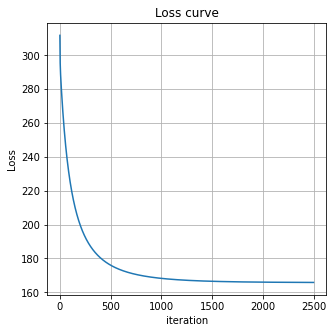

In [75]:
weight, costs = gradient_descent(x_trainG, y_train, weight, noOfIterations, mu)
print('Weight Matrix: ' + str(weight))

print("\033[4m\nOn Testing Dataset:\033[0m")
test(x_testG, y_test, weight)

print("\033[4m\nOn Training Dataset:\033[0m")
test(x_trainG, y_train, weight)

print("")

plotCost(costs)

###2.1.3 Newton's Method:

Find F'(x):

In [76]:
def findDelX(w, x, y):                #Return xT(e^xw/(1+e^xw) - y)
  ewx = np.exp(np.dot(x, w.T))
  p = ewx/(1+ewx)
  return np.dot(x.T, p - y).T

Find F"(x):

In [77]:
def findDelSquareX(w, x, y):          #Return xT * diag(p(x)*(1-p(x))) * x;
  num = np.exp(np.dot(x, w.T))
  den = np.power(1 + num, 2)
  D = np.diag(np.ravel(num / den))
  return np.dot(x.T, np.dot(D, x))

Parameters:

In [78]:
weight = np.array([0.1] *  len(x_trainG[0]))
iterations = 10

Gradient Descent:

Weight Matrix: [-7.09705727 -0.23171453  6.61154119 -1.23195123  2.74498098  3.32119871
  4.52119217]

On Testing Dataset:
Hit count: 156
Miss count:34
Accuracy: 82.10526315789474%

On Training Dataset:
Hit count: 360
Miss count:84
Accuracy: 81.08108108108108%



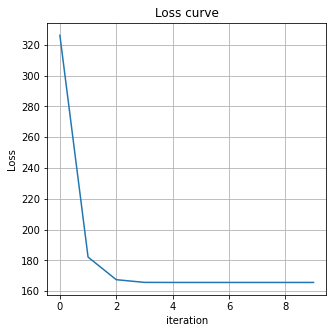

In [79]:
costs = []
for i in range(iterations):
  costs.append(computeCost(weight, y_train, x_trainG))
  del2 = np.linalg.inv(findDelSquareX(weight, x_trainG, y_train))
  del1 = findDelX(weight, x_trainG, y_train)
  weight = np.subtract(weight, np.dot(del2, del1))
print('Weight Matrix: ' + str(weight))

print("\033[4m\nOn Testing Dataset:\033[0m")
test(x_testG, y_test, weight)

print("\033[4m\nOn Training Dataset:\033[0m")
test(x_trainG, y_train, weight)

print("")

plotCost(costs)

##2.2 Naive Bayes (Univariate Gaussian):

Finding P(yi=c):

In [80]:
p_diabetic = np.count_nonzero(y_train)/len(y_train)

Split dataset into Diabetic and non-Diabetic:

In [81]:
x_trainDiabetic = []
x_trainNonDiabetic = []
for i in range(len(y_train)):
  if(y_train[i] == 1.0):
    x_trainDiabetic.append(x_train[i])
  else:
    x_trainNonDiabetic.append(x_train[i])

x_trainDiabetic = normalize(np.array(x_trainDiabetic))
x_trainNonDiabetic = normalize(np.array(x_trainNonDiabetic))

Find mean and variance:

In [82]:
Dia_Mean = np.mean(x_trainDiabetic, axis=0)
Dia_var = np.var(x_trainDiabetic, axis=0)
NonDia_Mean = np.mean(x_trainNonDiabetic, axis=0)
NonDia_var = np.var(x_trainNonDiabetic, axis=0)

Compute P(xi/yi):

In [83]:
def Gaussian(mean, var, x):
  denominator = math.sqrt(2.0*np.pi*var)
  pow = -1.0*(x-mean)*(x-mean)/(2.0*var)
  return np.exp(pow)/denominator

Inference:

In [84]:
def Inference(meanD, varD, meanND, varND, x, pDiab):
  gaussD = Gaussian(meanD, varD, x)
  gaussND = Gaussian(meanND, varND, x)
  pD = pDiab*gaussD
  pND = (1-pDiab)*gaussND
  if(pD > pND):
    return 1
  return 0

Testing Algo:

In [85]:
def testUGNB(index, x, y):
  success = 0
  for i in range(len(x)):
    infer = Inference(Dia_Mean[index], Dia_var[index], NonDia_Mean[index], NonDia_var[index], x[i][index], p_diabetic)
    if(infer == int(y[i])):
      success += 1

  Accuracy = 100.0 * success/len(x)  
  Miss = len(x) - success
  print('Hit count: ' + str(success))
  print('Miss count:' + str(Miss))
  print('Accuracy: '+ str(Accuracy) + '%' )

Plot Gaussian curve:

In [86]:
def plotProbability(index, Ttitle):
  x1 = np.linspace(Dia_Mean[index]-3.5* math.sqrt(Dia_var[index]), Dia_Mean[index]+3.5* math.sqrt(Dia_var[index]),500)
  x2 = np.linspace(NonDia_Mean[index]-3.5*math.sqrt(NonDia_var[index]),NonDia_Mean[index]+3.5*math.sqrt(NonDia_var[index]),500)
  plt.plot(x2, (1 - p_diabetic) * stats.norm.pdf(x1, NonDia_Mean[index], math.sqrt(NonDia_var[index])))
  plt.plot(x1, p_diabetic * stats.norm.pdf(x1, Dia_Mean[index], math.sqrt(Dia_var[index])))
  plt.legend(['0','1'])
  plt.title(Ttitle)
  plt.xlabel('x')
  plt.ylabel('p(x)')
  plt.grid()
  plt.show()

###2.2.1 Pregnancies:

Histogram:


On Testing Dataset:
Hit count: 121
Miss count:69
Accuracy: 63.68421052631579%

On Training Dataset:
Hit count: 285
Miss count:159
Accuracy: 64.1891891891892%



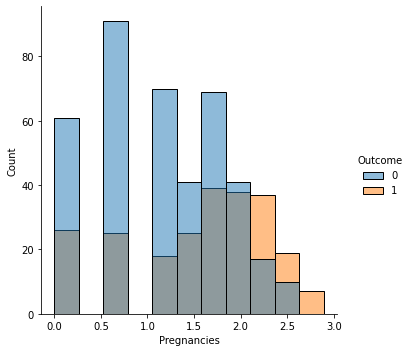

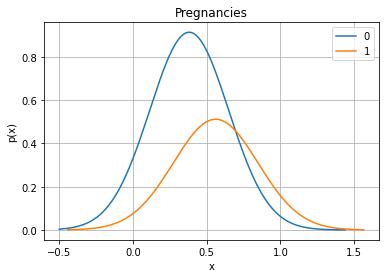

In [87]:
print("\033[4m\nOn Testing Dataset:\033[0m")
testUGNB(0, x_test, y_test)
print("\033[4m\nOn Training Dataset:\033[0m")
testUGNB(0, x_train, y_train)
print("")
sns.displot(df, x='Pregnancies', hue='Outcome')
plt.show()
print("")
plotProbability(0, 'Pregnancies')

###2.2.2 Glucose:

Histogram:


On Testing Dataset:
Hit count: 135
Miss count:55
Accuracy: 71.05263157894737%

On Training Dataset:
Hit count: 320
Miss count:124
Accuracy: 72.07207207207207%



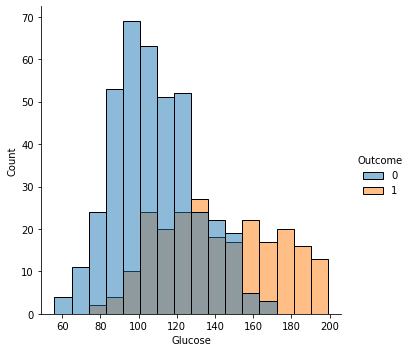

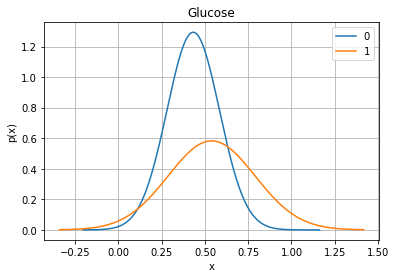

In [88]:
print("\033[4m\nOn Testing Dataset:\033[0m")
testUGNB(1, x_test, y_test)
print("\033[4m\nOn Training Dataset:\033[0m")
testUGNB(1, x_train, y_train)
print("")
sns.displot(df, x='Glucose', hue='Outcome')
plt.show()
print("")
plotProbability(1, 'Glucose')

###2.2.3 BloodPressure:

Histogram:


On Testing Dataset:
Hit count: 105
Miss count:85
Accuracy: 55.26315789473684%

On Training Dataset:
Hit count: 272
Miss count:172
Accuracy: 61.26126126126126%



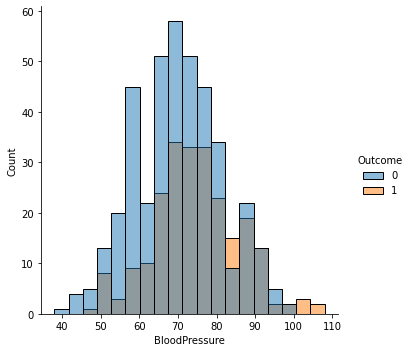

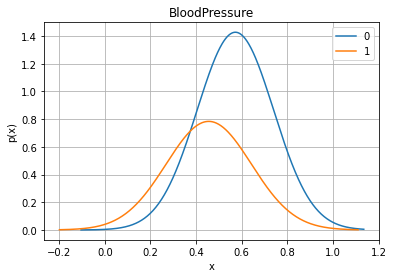

In [89]:
print("\033[4m\nOn Testing Dataset:\033[0m")
testUGNB(2, x_test, y_test)
print("\033[4m\nOn Training Dataset:\033[0m")
testUGNB(2, x_train, y_train)
print("")
sns.displot(df, x='BloodPressure', hue='Outcome')
plt.show()
print("")
plotProbability(2, 'BloodPressure')

###2.2.4 BMI:

Histogram:


On Testing Dataset:
Hit count: 119
Miss count:71
Accuracy: 62.63157894736842%

On Training Dataset:
Hit count: 281
Miss count:163
Accuracy: 63.288288288288285%



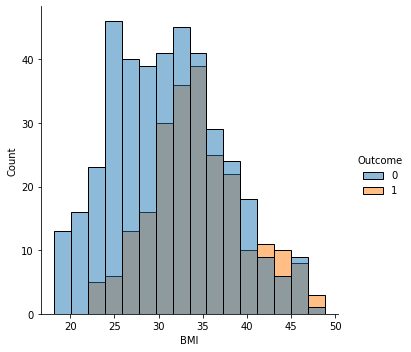

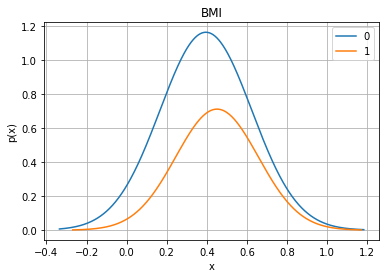

In [90]:
print("\033[4m\nOn Testing Dataset:\033[0m")
testUGNB(3, x_test, y_test)
print("\033[4m\nOn Training Dataset:\033[0m")
testUGNB(3, x_train, y_train)
print("")
sns.displot(df, x='BMI', hue='Outcome')
plt.show()
print("")
plotProbability(3, 'BMI')

###2.2.5 DiabetesPedigreeFunction:

Histogram:


On Testing Dataset:
Hit count: 124
Miss count:66
Accuracy: 65.26315789473684%

On Training Dataset:
Hit count: 297
Miss count:147
Accuracy: 66.89189189189189%



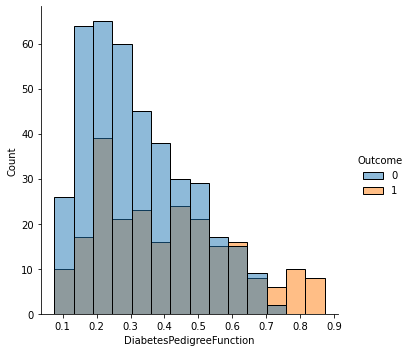

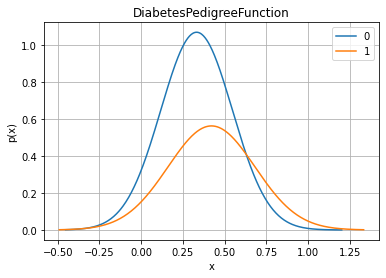

In [91]:
print("\033[4m\nOn Testing Dataset:\033[0m")
testUGNB(4, x_test, y_test)
print("\033[4m\nOn Training Dataset:\033[0m")
testUGNB(4, x_train, y_train)
print("")
sns.displot(df, x='DiabetesPedigreeFunction', hue='Outcome')
plt.show()
print("")
plotProbability(4, 'DiabetesPedigreeFunction')

###2.2.6 Age:

Histogram:


On Testing Dataset:
Hit count: 134
Miss count:56
Accuracy: 70.52631578947368%

On Training Dataset:
Hit count: 321
Miss count:123
Accuracy: 72.29729729729729%



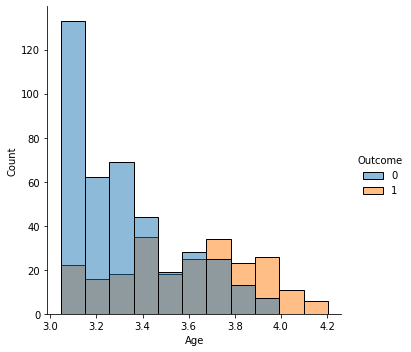

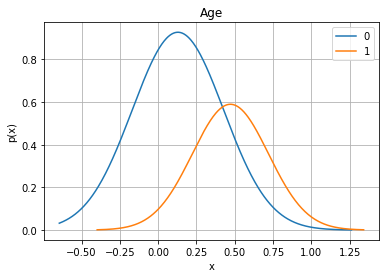

In [92]:
print("\033[4m\nOn Testing Dataset:\033[0m")
testUGNB(5, x_test, y_test)
print("\033[4m\nOn Training Dataset:\033[0m")
testUGNB(5, x_train, y_train)
print("")
sns.displot(df, x='Age', hue='Outcome')
plt.show()
print("")
plotProbability(5, 'Age')

##2.3 Naive Bayes (Multivariate Gaussian):

Here, we don't implement Naive Bayes for multivariate gaussian. Instead, we explore the dataset to see if there are any columns due to which multivariate gaussian would have performed better.

Heatmap of Correlation matrix:

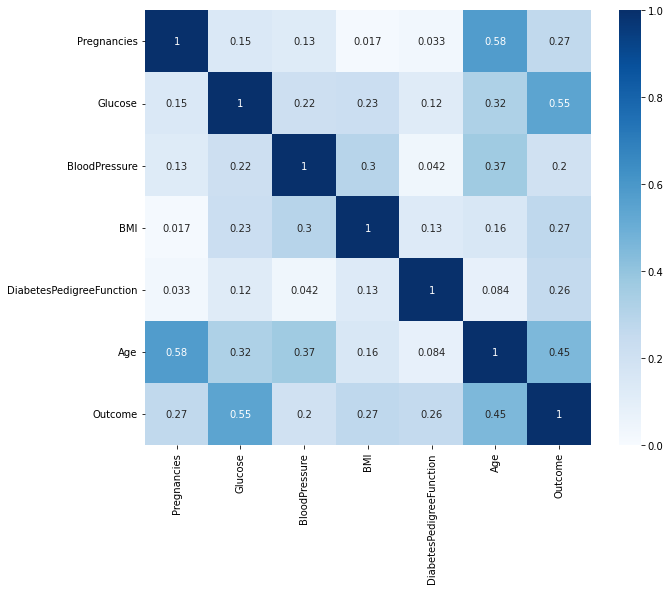

In [93]:
plt.figure(figsize=(10,8))
cmap = sns.cm.rocket_r
sns.heatmap(df.corr().abs(), vmin = 0, annot=True, cmap="Blues")

The above heatmap gives us a correlation matrix where each cell denotes the correlation coefficient of the corresponding features. We interpret correlation coefficient as follows:

*   A positive correlation coefficient means both the features have a positive relationship. It implies that both the features will increase together and decrease together.
*   Similarly, a negative correlation coefficient implies that the features have negative relationship. It implies that one feature will decrease as other increases.
*   A correlation coefficient of zero implies that both the features are independent of each other.

While implementing multivariate gaussian, we assume the features to be independent of each other. For this reason, we would prefer features which are strongly independent of each other. Thus, features whose correlation coefficients are closer to zero would be prefered over the features whose coefficients are farther away from zero. 

Some pair of features that satisfy the above condition are as follows:

*   BMI and Pregnancies (Correlation Coefficient: 0.017)
*   DiabetesPedigreeFunction and Pregnancies (Correlation Coefficient: 0.033)
*   DiabetesPedigreeFunction and BloodPressure (Correlation Coefficient: 0.042)
*   Age and DiabetesPedigreeFunction (Correlation Coefficient: 0.084)

We would prefer these set of features for multivariate gaussian because of their strong linear independence as compaired to other pairs of features.
